In [1]:
import torch
import cuml
import cugraph
import cudf

In [2]:
event = torch.load("/global/cfs/cdirs/m3443/usr/ryanliu/TrackML_data/filter_processed/train/1000").cpu()
event.nhits = event.pid.unique(return_counts = True)[1][event.pid.unique(return_inverse = True)[1]]
event.nhits[event.pid == 0] = 0

In [3]:
event.pid[event.edge_index.unique()].unique().shape

torch.Size([9829])

In [9]:
import matplotlib.pyplot as plt

In [12]:
connectivity = event.edge_index.unique(return_counts = True)[1]

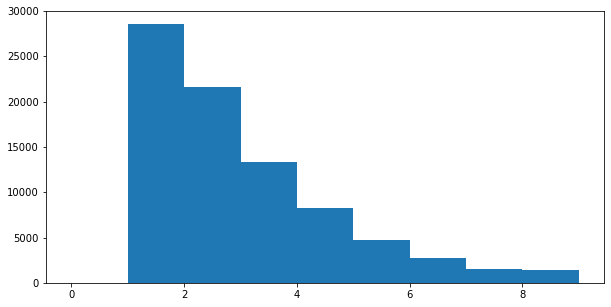

In [15]:
plt.figure(figsize = (10, 5))
plt.hist(connectivity, bins = range(10))
plt.show()

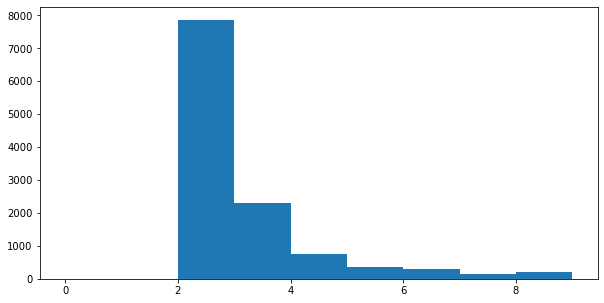

In [44]:
G = cugraph.Graph()
G.from_cudf_edgelist(cudf.DataFrame({"src": event.edge_index[0].numpy(), "dst": event.edge_index[1].numpy()}), source = "src", destination = "dst")
labels = -torch.ones(event.pid.shape).long()
labels[torch.as_tensor(cugraph.connected_components(G)["vertex"])] = torch.as_tensor(cugraph.connected_components(G)["labels"]).long()
plt.figure(figsize = (10, 5))
plt.hist(labels.unique(return_counts = True)[1], bins = range(10))
plt.show()

In [55]:
nhits = labels.unique(return_counts = True)[1][labels.unique(return_inverse = True)[1]]
print(((event.pt[nhits <=2] > 1) & (event.pid[nhits <=2] != 0) & (event.nhits[nhits <= 2] >= 5)).sum())
print(((event.pt[labels == -1] > 1) & (event.pid[labels == -1] != 0) & (event.nhits[labels == -1] >= 5)).sum())

tensor(2032)
tensor(78)
